# Shapes

In [10]:
from shapes.data import ShapeDataset
import numpy as np
import matplotlib.pyplot as plt

In [5]:
dataset = ShapeDataset(
    N=50,
    t=100,
    balance=False,
    h_batch=100,
    predict_ahead=1,
    receptive_field=20,
)

torch.Size([50, 1, 100])
torch.Size([50, 1, 100])
torch.Size([50, 1, 1])
Dimension of X :  torch.Size([50, 1, 100])
Dimension of Y :  torch.Size([50, 1, 100])


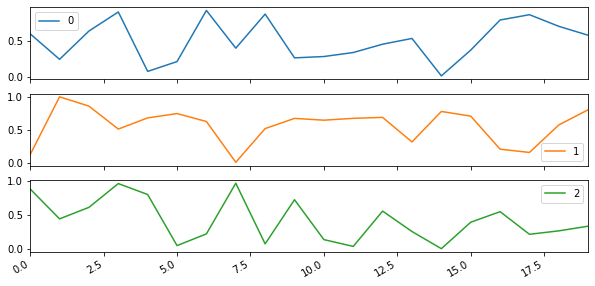

In [6]:
dataset.plot_examples()

In [7]:
from scipy import signal

In [65]:
N = 50
t = 100
p = 2
f = 1/p * np.pi # 10 gives alternating at each step, 1 gives alternating ~ every 10th

## Square

In [87]:
np.tile(np.concatenate((np.ones(3), -np.ones(3)), axis=None), 10//(2*3)+1)[:10].shape

(10,)

In [117]:
def square(t, p, mean=0, var=1, start=1):
    """ Creating a square signal that alternates every p step. """
    s = np.tile(np.concatenate((start*np.ones(p), -start*np.ones(p)), axis=None), t//(2*p)+1)[:t]
    s = s*var + mean
    assert(len(s) == t)
    return s
square(50, 5)

array([ 1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,
        1.,  1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1., -1.,
       -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1.,
       -1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1.])

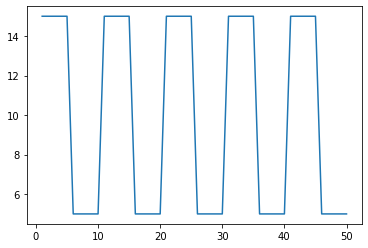

In [118]:
x = np.linspace(1, 50, 50)
s = square(50, 5, mean=10, var=5)
plt.plot(x,s)

## Triangle

In [ ]:
y = 1-x*(2//p)

In [137]:
def triangle(t, p, mean=0, var=1, start=1):
    y = np.array([(1 - 2/p*x) for x in range(p)])
    s = np.tile(np.concatenate((start*y, -start*y), axis=None), t//(2*p)+1)[:t]
    s = s*var + mean
    assert(len(s) == t)
    return s
triangle(10, 4)

[ 1.   0.5  0.  -0.5]


array([ 1. ,  0.5,  0. , -0.5, -1. , -0.5,  0. ,  0.5,  1. ,  0.5])

[ 1.   0.8  0.6  0.4  0.2  0.  -0.2 -0.4 -0.6 -0.8]


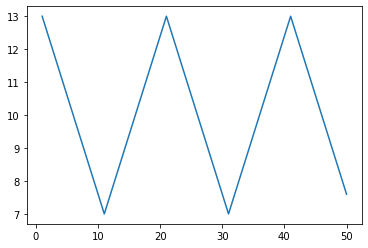

In [142]:
x = np.linspace(1, 50, 50)
s = triangle(50, 10, mean=10, var=3)
plt.plot(x,s)

## Sine

In [220]:
def sine(t, p, mean=0, var=1, start=1):
    x = np.linspace(1, t, t)
    s = np.sin(1/p*x*2*np.pi)
    s = s*var + mean
    assert(len(s) == t)
    return s
sine(50, 20)

array([ 3.09016994e-01,  5.87785252e-01,  8.09016994e-01,  9.51056516e-01,
        1.00000000e+00,  9.51056516e-01,  8.09016994e-01,  5.87785252e-01,
        3.09016994e-01,  1.22464680e-16, -3.09016994e-01, -5.87785252e-01,
       -8.09016994e-01, -9.51056516e-01, -1.00000000e+00, -9.51056516e-01,
       -8.09016994e-01, -5.87785252e-01, -3.09016994e-01, -2.44929360e-16,
        3.09016994e-01,  5.87785252e-01,  8.09016994e-01,  9.51056516e-01,
        1.00000000e+00,  9.51056516e-01,  8.09016994e-01,  5.87785252e-01,
        3.09016994e-01,  3.67394040e-16, -3.09016994e-01, -5.87785252e-01,
       -8.09016994e-01, -9.51056516e-01, -1.00000000e+00, -9.51056516e-01,
       -8.09016994e-01, -5.87785252e-01, -3.09016994e-01, -4.89858720e-16,
        3.09016994e-01,  5.87785252e-01,  8.09016994e-01,  9.51056516e-01,
        1.00000000e+00,  9.51056516e-01,  8.09016994e-01,  5.87785252e-01,
        3.09016994e-01,  6.12323400e-16])

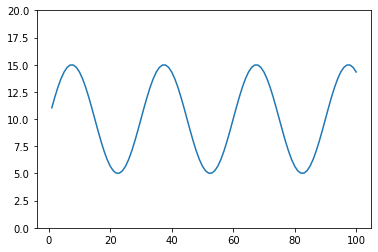

In [223]:
x = np.linspace(1, 100, 100)
s = sine(100, 30, mean=10, var=5)
plt.ylim(0,20)
plt.plot(x,s)

# Noise

In [224]:
def iid_noise(x, var=0.2):
    noise = var * np.random.randn(len(x))
    x += noise
    return x

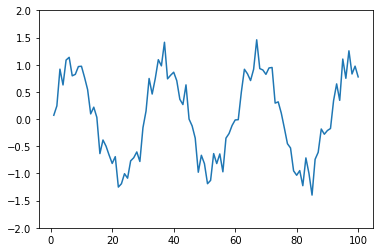

In [272]:
x = np.linspace(1, 100, 100)
s = sine(100, 30, mean=0, var=1)
s = iid_noise(s)
plt.ylim(-2,2)
plt.plot(x,s)

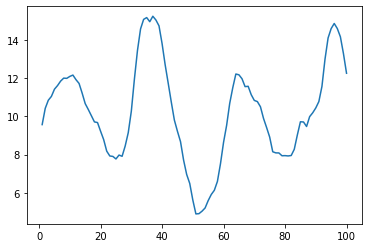

In [459]:
def matern_noise(s, var=1, nu=1.5):
    """ nu determines the smoothness. smaller is less smooth """
    gp = GaussianProcessRegressor(kernel=var*Matern(length_scale=10, length_scale_bounds=(1e-5, 1e5),nu=nu))
    x = np.linspace(1, len(s), len(s))
    sample = gp.sample_y(x.reshape(-1,1), 1, random_state=None).flatten()

    return s + sample

x = np.linspace(1, 100, 100)
s = sine(100, 30, mean=10, var=3)
m = matern_noise(s)
#plt.ylim(-2, 2)
plt.plot(x,m)

# One function to rule them all

[ 1.   0.8  0.6  0.4  0.2  0.  -0.2 -0.4 -0.6 -0.8]


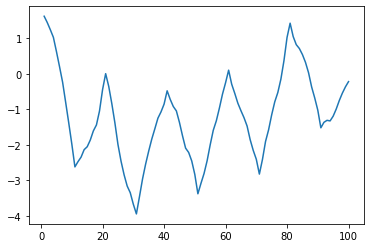

In [475]:
from typing import List
def shape_series(shape, length=100, period=10, mean=0, var=1, noise=None, noise_var=1) -> List[float]:
    """ Creates a shape series and adds noise to it. """
    assert shape in ["sine", "triangle", "square"]
    assert noise in [None, "iid", "matern"]
    if shape == "sine":
        s = sine(length, period, mean, var)
    elif shape == "square":
        s = square(length, period, mean, var)
    elif shape == "triangle":
        s = triangle(length, period, mean, var)
    if noise == "iid":
        s += iid_noise(s)
    elif noise == "matern":
        s += matern_noise(s)
    return s

plt.plot(np.linspace(1,100,100), shape_series("triangle", length=100, period=10, noise="matern"))


In [ ]:
def square(t, p, mean=0, var=1):

    return s

In [ ]:
def square(t, p, mean=0, var=1):
    s = 
    return s

(-2, 2)

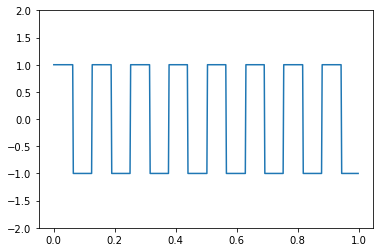

In [62]:
t = np.linspace(0, 1, 500, endpoint=False)
plt.plot(t, signal.square( 50*t))
plt.ylim(-2, 2)
